In [18]:
import numpy as np
from qiskit import *
%matplotlib inline
from math import pi, sqrt
import random
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle
#pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [19]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumC):
    return visualization.plot_bloch_multivector(execute(quantumC, backend).
                                         result().get_statevector())

In [20]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
    return newState

In [21]:
def getMeasure(quantumC, n):
    measures = []
    for i in range(0, n):
        outcome = execute(quantumC, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
    return measures

In [22]:
def makeCirc(n, state):
    initState = state
    print(initState)
    qr = QuantumRegister(n)
    qc = ClassicalRegister(n)
    circ = QuantumCircuit(qr, qc)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [124]:
def getHisto(n):
    qasm_sim = Aer.get_backend('qasm_simulator')
    shots = n
    qobj = assemble(circ, shots=shots)
    results = qasm_sim.run(qobj).result()
    counts = results.get_counts()
    def bdotz(b, z):
        accum = 0
        for i in range(len(b)):
            accum += int(b[i]) * int(z[i])
        return (accum % 2)
    su = []
    s = slice(n, 2*n)
    for z in counts:
        if z[s] not in su:
            su.append(z[s])
    print(su)
    for z in su:
        print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )
    return counts

In [125]:
def simonCircuit(b):
    n = len(b)
    simon_circuit = QuantumCircuit(n*2, n*2)
    simon_circuit.h(range(n))   
    
    simon_circuit.barrier()
    simon_circuit += simon_oracle(b)
    simon_circuit.barrier()

    simon_circuit.measure(range(n, 2*n), range(n, 2*n))
    simon_circuit.barrier()
    simon_circuit.h(range(n))
    simon_circuit.barrier()
    
    simon_circuit.measure(range(n), range(n))
    return simon_circuit

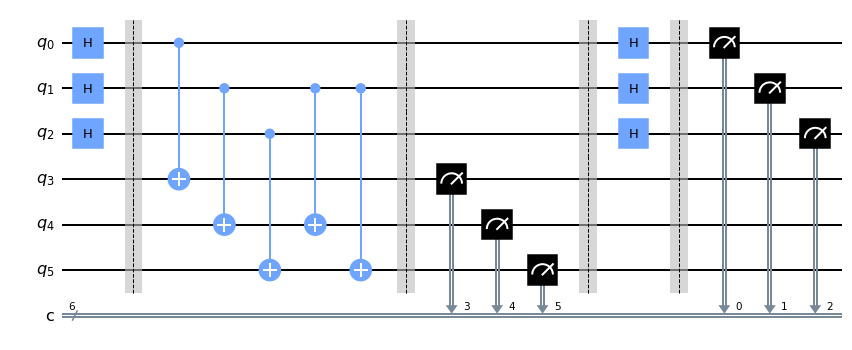

In [126]:
circ = simonCircuit('110')
circ.draw('mpl')

In [128]:
w = getHisto(4)

['00', '01', '11']


IndexError: string index out of range